# Forward modeling and atmospheric retrieval: HAT-P-11b

The following is a demonstration of the PLATON tool developed by Michael Zhang (CalTech) et al. PLATON is a Python package that quickly predicts transit/eclipse depths given various atmospheric parameters and infers parameters given observed transit/eclipse depths at various wavelengths. More info here: https://platon.readthedocs.io/en/latest/intro.html

The following is a replication of the retrieved atmospheric parameters and modeled transmission spectrum reported in a paper on the warm Neptune HAT-P-11b found here: https://ui.adsabs.harvard.edu/abs/2019AJ....158..244C/abstract

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from platon.transit_depth_calculator import TransitDepthCalculator
from platon.constants import M_jup, R_sun, R_jup

# All quantities in SI
Rs = 0.683 * R_sun     #Radius of star
Mp = 0.0736 * M_jup     #Mass of planet
Rp = 0.389 * R_jup     #Radius of planet
T = 800              #Assumes isothermal atmosphere in chemical equilibrium

#create a TransitDepthCalculator object and compute wavelength dependent transit depths
depth_calculator = TransitDepthCalculator(method="ktables")
wavelengths, transit_depths = depth_calculator.compute_depths(
    Rs, Mp, Rp, T, CO_ratio=0.5, cloudtop_pressure=1e4)

/Users/collin/anaconda3/lib/python3.7/site-packages/platon-5.0-py3.7.egg/platon/_atmosphere_solver.py:394: RuntimeWarning: invalid value encountered in less
  low_abundances = abundances[name] < min_abundance


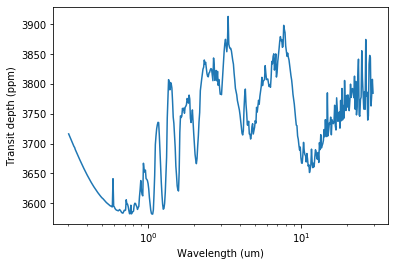

,Wavelength,Depth
0,3.014969e-07,0.003716
1,3.045209e-07,0.003713
2,3.075752e-07,0.003711
3,3.106601e-07,0.003708
4,3.137760e-07,0.003706


In [2]:
import pandas as pd

#Create a pandas dataframe to store the spectral data
df = pd.DataFrame(columns = ['Wavelength', 'Depth'])
waves = []
depths = []

for i in range(len(wavelengths)):
    waves.append(wavelengths[i])
    depths.append(transit_depths[i])

df['Wavelength'] = waves
df['Depth'] = depths

#Plot the transmission spectrum
plt.semilogx(1e6*wavelengths, 1e6*transit_depths)
plt.xlabel("Wavelength (um)")
plt.ylabel("Transit depth (ppm)")
plt.show()

df.head()